# C&S 4.2modified. This is a calculation of flow rate in a pipeline with fluid properties as a function of temperature.  Instead of using MATLAB we will use python.

**Problem Statement**<br>
(a) Calculate the flow rate q (in gal/min) for a pipeline with effective length
of L = 1000 ft and made of nominal 8-inch diameter schedule 40 commercial
steel pipe. (Solution: v = 11.61 ft/s, gpm = 1811 gal/min)<br>
(b) Next copy your function, rename it, and modify it so that it has 4 input parameters of v, D, L and T.  Then you will send this function to fsolve and  use the args parameter which is a tuple. Calculate the flow velocities in ft/s and flow rates in gal/min for pipelines at 60°F with effective lengths of L = 500 and then increase by 500 ft up to 10,000 ft and made of nominal 4-, 5-, 6- and 8-inch schedule 40 commercial steel pipe.  Prepare plots of flow velocity v versus D and L, and flow rate q versus D and L.<br>


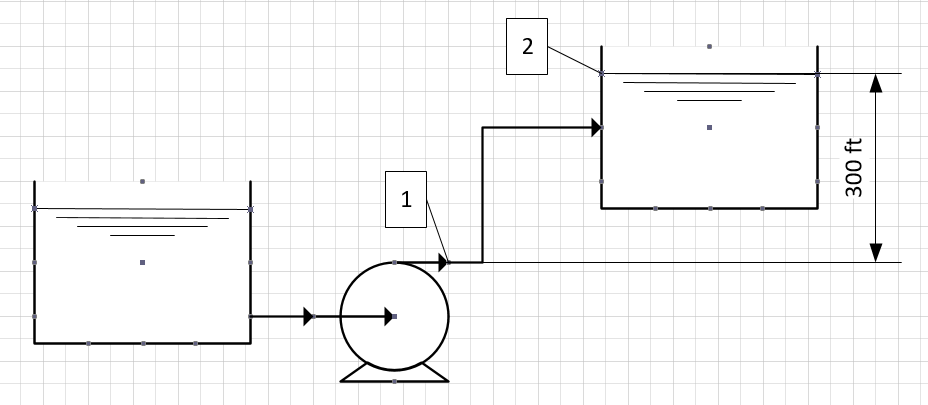

The above figure shows a pipeline that delivers water at a constant temperature
T = 60°F from point 1 where the pressure is $p_1$ = 150 psig and the elevation is
$z_1$ = 0 ft to point 2 where the pressure is atmospheric and the elevation is
$z_2$ = 300 ft.

General Mechanical Energy Balance
$$\frac{1}{2} \rho v_1^2+\rho g z_1+P_1+ \frac{\dot{W_s}}{Q} = \frac{1}{2} \rho v_2^2+\rho g z_2+P_2+ \frac{2 \rho f_F v_1^2 L_{12}}{D}$$
with $z_1 = 0$   $v_2  \approx 0$  $P_2  \approx 0$
$$\rho = 62.122 +   0.0122T -   1.54\times 10^{-4}T^2 +   2.65\times 10^{-7}T^3 -  2.24\times 10^{-10}T^4$$
$$\log\mu=-11.0318+\frac{1057.51}{T+214.624}$$
$$f_F = \frac{1}{16} \left\{\log \left[\frac{\varepsilon/D}{3.7}-\frac{5.02}{Re}\log\left(\frac{\varepsilon/D}{3.7}+\frac{14.5}{Re}\right)\right]\right\}^2$$

where $\frac{\varepsilon}{D}$ is the surface roughness of the pipe (ε = 0.00015 ft for commercial steel pipes).
In all of the above equations the units of $ T [=] °F$ and $\rho [=] lb_m/ft^3$ and $\mu [=] lb_m/ft/s$ <br>
Remember to convert between $lb_m$ and $ lb_f$ using the conversion factor $1 lb_f=32.174\frac{ft  lb_m}{s^2}$

The flow velocity in the pipeline can be converted to flow rate by multiplying
it by the cross section are of the pipe, the density of water (7.481 gal/ft3), and factor (60 s/min). Thus q has units of (gal/min). The inside diameters (D) of nominal 4-, 5-, 6-, and 8-inch schedule 40 commercial steel pipes are given below:  

To find the velocity we need an iterative process.  
1. Guess $v_\text{Guess}$
2. calculate Re
3. calculate $f_F$
4. calculate $v_\text{calc}=\frac{\left[23.174\Delta z+\Delta P 144 \frac{32.174}{\rho}\right]^{0.5}}{(0.5-2f_FL/D)}$
5. calculate the error which should be zero $\text{fv}=0=v_\text{Guess}-v_\text{calc}$

To iterate this procedure we will use function fsolve

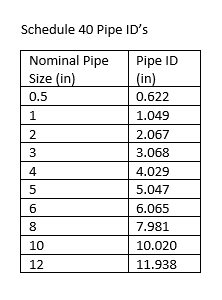



In [ ]:
#These commands import libraries that make python very useful
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
def NLEfunSimple(v): 
    D=7.981/12
    L=1000
    T=60
    epsilon = 0.00015 #Surface rougness of the pipe (ft) 

    rho = 62.122 + T * (0.0122 + T * (-0.000154 + T * (0.000000265 - (T * 0.000000000224)))) #Fluid density (lb/cu. ft.) 

    deltaz = 300 #Elevation difference (ft)

    deltaP = -150 #Pressure difference (psi) 

    vis = np.exp(-11.0318 + 1057.51 / (T + 214.624)) #Fluid viscosity (lbm/ft-s)
   
    pi = 3.1416 #The constant pi 

    eoD = epsilon / D #Pipe roughness to diameter ratio (dimensionless)

    Re = D * v * rho / vis #Reynolds number (dimesionless) 

    if (Re < 2100): #Fanning friction factor (dimensionless)
        fF = 16 / Re
    else:
        fF = 1 / (16 * np.log10(eoD / 3.7 - (5.02 * np.log10(eoD / 3.7 + 14.5 / Re) / Re)) ** 2)
     

    q = v * pi * D ** 2 / 4 * 7.481 * 60 #Flow rate (gal/min) #This equation is not used in this function

    fv = v - np.sqrt((32.174 * deltaz + deltaP * 144 * 32.174 / rho) / (0.5 - (2 * fF * L / D))) #Flow velocity (ft/s) 

    return fv

In [ ]:
#Check the function
value=NLEfunSimple(11.61)
print(value)

-0.00319173998961908


In [ ]:
v=fsolve(NLEfunSimple,11.5)
fv=NLEfunSimple(v)
print (v,type(v),fv,type(fv))#This is to remind you that the output from fsolve is a vector
print('v={:.4f}  fv={:.2e}' .format(v[0],fv[0]))

[11.61331749] <class 'numpy.ndarray'> [-1.77635684e-15] <class 'numpy.ndarray'>
v=11.6133  fv=-1.78e-15


Now to solve for part b we will add D, L, and T to in the input parameters of the function and rename it NLEfun.  You will have to remove the L= D= T= lines.,<br>
Test the function.<br>
Call fsolve, but you can only send one guess to fsolve since you only have one equation.<br>
Next test it out for values of D, L and T with a guess of v

In [ ]:
#Paste new function NLEfun below
def NLEfun(v,D,L,T): 

  return fv

Test the function in this cell

In [ ]:
D=7.981/12 #8' pipe ID in feet
L=1000
T=60
value=NLEfun(10.5,D,L,T)
print(value)







Now find the velocity for that pipe size using fsolve

In [ ]:
args=(D,L,T)#You must use parenthesis because fsolve requires a tuple!
fsolve(NLEfun,10.5,args)
print('v={:.4f}ft/s fv={:.2e}' .format(v[0],fv[0]))

v=11.6133ft/s fv=-1.78e-15


**The rest of this notebook is the solution to print out a table and graph** **bold text**

In [ ]:
def NLEfun(v,D,L,T): 
 
    epsilon = 0.00015 #Surface rougness of the pipe (ft) 

    rho = 62.122 + T * (0.0122 + T * (-0.000154 + T * (0.000000265 - (T * 0.000000000224)))) #Fluid density (lb/cu. ft.) 

    deltaz = 300 #Elevation difference (ft)

    deltaP = -150 #Pressure difference (psi) 

    vis = np.exp(-11.0318 + 1057.51 / (T + 214.624)) #Fluid viscosity (lbm/ft-s)
   
    pi = 3.1416 #The constant pi 

    eoD = epsilon / D #Pipe roughness to diameter ratio (dimensionless)

    Re = D * v * rho / vis #Reynolds number (dimesionless) 

    if (Re < 2100): #Fanning friction factor (dimensionless)
        fF = 16 / Re
    else:
        fF = 1 / (16 * np.log10(eoD / 3.7 - (5.02 * np.log10(eoD / 3.7 + 14.5 / Re) / Re)) ** 2)
     

    q = v * pi * D ** 2 / 4 * 7.481 * 60 #Flow rate (gal/min) 

    fv = v - np.sqrt((32.174 * deltaz + deltaP * 144 * 32.174 / rho) / (0.5 - (2 * fF * L / D))) #Flow velocity (ft/s) 

    return fv


In [ ]:
D=7.981/12
L=1000
T=60
value=NLEfun(10.5,D,L,T)
print(value)

-1.0675994747845419


In [ ]:
D_list=[4.026/12, 5.047/12, 6.065/12, 7.981/12] # Inside diameter of pipe (ft)
L_list=np.arange(500,10500,500)

row_num=len(L_list)
col_num=len(D_list)
#initialize arrays
varray=np.zeros((row_num,col_num))
fvarray=np.zeros((row_num,col_num))
qarray=np.zeros((row_num,col_num))
T = 60 #Temperature (deg. F) 
for col in range(len(D_list)):
    D = D_list[col]
    for row in range(len(L_list)):
        L=L_list[row]
        args=(D,L,T)

        varray[row,col]=fsolve(NLEfun,10.5,args)
        fvarray[row,col]=NLEfun(varray[row,col],D,L,T)
        qarray[row,col] = varray[row,col] * math.pi* D ** 2 / 4 * 7.481 * 60 #Flow rate (gal/min) 
        
        print('row= {:d} v=  {:.4f} L={:.0f} D={:.4f} fv={:.2e}' .format(row,varray[row,col],L,D,fvarray[row,col]))

row= 0 v=  10.7734 L=500 D=0.3355 fv=0.00e+00
row= 1 v=  7.4207 L=1000 D=0.3355 fv=9.15e-14
row= 2 v=  5.9721 L=1500 D=0.3355 fv=-8.88e-16
row= 3 v=  5.1188 L=2000 D=0.3355 fv=0.00e+00
row= 4 v=  4.5409 L=2500 D=0.3355 fv=-8.88e-16
row= 5 v=  4.1168 L=3000 D=0.3355 fv=-8.88e-16
row= 6 v=  3.7888 L=3500 D=0.3355 fv=4.44e-16
row= 7 v=  3.5255 L=4000 D=0.3355 fv=0.00e+00
row= 8 v=  3.3082 L=4500 D=0.3355 fv=4.44e-16
row= 9 v=  3.1249 L=5000 D=0.3355 fv=4.44e-16
row= 10 v=  2.9677 L=5500 D=0.3355 fv=8.88e-16
row= 11 v=  2.8309 L=6000 D=0.3355 fv=4.44e-16
row= 12 v=  2.7106 L=6500 D=0.3355 fv=8.88e-16
row= 13 v=  2.6036 L=7000 D=0.3355 fv=1.78e-15
row= 14 v=  2.5077 L=7500 D=0.3355 fv=1.33e-15
row= 15 v=  2.4211 L=8000 D=0.3355 fv=1.78e-15
row= 16 v=  2.3424 L=8500 D=0.3355 fv=1.78e-15
row= 17 v=  2.2706 L=9000 D=0.3355 fv=2.22e-15
row= 18 v=  2.2046 L=9500 D=0.3355 fv=3.55e-15
row= 19 v=  2.1437 L=10000 D=0.3355 fv=4.44e-15
row= 0 v=  12.5165 L=500 D=0.4206 fv=0.00e+00
row= 1 v=  8.6048 L=

In [ ]:
# printing Tables
#Printing table 
print('                 Flow Velocity (ft/s) versus Pipe Length and Diameter')
print('                                   Tabular Results')
print('\n')
print('         L\D        D=4"         D=5"         D=6"          D=8"');

for row in range(row_num):
    print('         {:.0f}       {:.4f}    {:.4f}      {:.4f}       {:.4f}'.format(L_list[row],
            varray[row,0],varray[row,1],varray[row,2],varray[row,3]))

                 Flow Velocity (ft/s) versus Pipe Length and Diameter
                                   Tabular Results


         L\D        D=4"         D=5"         D=6"          D=8"
         500       10.7734    12.5165      14.1496       17.0346
         1000       7.4207    8.6048      9.7032       11.6133
         1500       5.9721    6.9243      7.8051       9.3295
         2000       5.1188    5.9361      6.6912       7.9953
         2500       4.5409    5.2674      5.9382       7.0953
         3000       4.1168    4.7769      5.3861       6.4362
         3500       3.7888    4.3975      4.9592       5.9270
         4000       3.5255    4.0930      4.6166       5.5185
         4500       3.3082    3.8416      4.3338       5.1815
         5000       3.1249    3.6297      4.0953       4.8973
         5500       2.9677    3.4478      3.8907       4.6535
         6000       2.8309    3.2896      3.7128       4.4415
         6500       2.7106    3.1504      3.5561       4.2548
  

In [ ]:
#Printing table 
print('\n','\n')
print('                    Flow Rate (gpm) versus Pipe Length and Diameter');
print('                                    Tabular Results');
print('\n ')
print('         L\D        D=4"         D=5"         D=6"         D=8"');
       
for row in range(row_num):
    print('         {:.0f}         {:.2f}    {:.2f}      {:.2f}       {:.2f}'.format(L_list[row],
            qarray[row,0],qarray[row,1],qarray[row,2],qarray[row,3]))



 

                    Flow Rate (gpm) versus Pipe Length and Diameter
                                    Tabular Results

 
         L\D        D=4"         D=5"         D=6"         D=8"
         500         427.50    780.53      1274.22       2656.35
         1000         294.46    536.59      873.81       1810.96
         1500         236.98    431.80      702.87       1454.83
         2000         203.12    370.17      602.56       1246.77
         2500         180.19    328.48      534.75       1106.43
         3000         163.36    297.89      485.03       1003.66
         3500         150.35    274.23      446.59       924.25
         4000         139.90    255.24      415.74       860.55
         4500         131.27    239.56      390.27       807.99
         5000         124.00    226.35      368.80       763.68
         5500         117.76    215.01      350.37       725.66
         6000         112.33    205.14      334.35       692.60
         6500         107.56    196

Text(0, 0.5, 'Flow rate (gpm)')

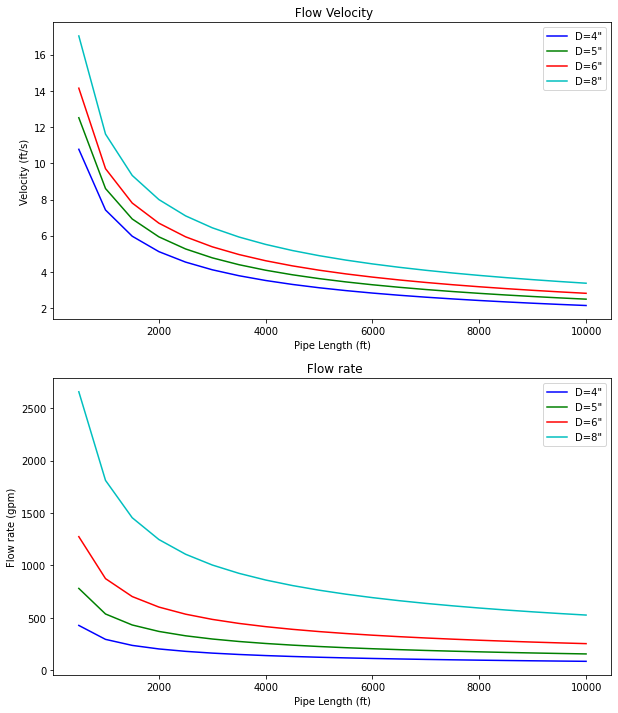

In [ ]:
#print plots

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(L_list,varray[:,0],'b',label='D=4"')
plt.plot(L_list,varray[:,1],'g',label='D=5"')
plt.plot(L_list,varray[:,2],'r',label='D=6"')
plt.plot(L_list,varray[:,3],'c',label='D=8"')


plt.legend()
plt.title(' Flow Velocity')
plt.xlabel('Pipe Length (ft)')
plt.ylabel('Velocity (ft/s)')

plt.subplot (2,1,2)
plt.plot(L_list,qarray[:,0],'b',label='D=4"')
plt.plot(L_list,qarray[:,1],'g',label='D=5"')
plt.plot(L_list,qarray[:,2],'r',label='D=6"')
plt.plot(L_list,qarray[:,3],'c',label='D=8"')

plt.legend()
plt.title(' Flow rate')
plt.xlabel('Pipe Length (ft)')
plt.ylabel('Flow rate (gpm)')

Make a copy of this template and make velocity and flowrate Tables and graphs for nominal pipe diameters of 2, 4, 6, 8, 10 and 12 inch pipes. In the graph change the order of the legend so that the top legend corresponds to the top line in each plot. For example the above plots are not correct! Submit your revised jupyter notebook and pdf.